In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

### Comformal Distances, Angular Diameter Distances, and Luminosity Distances


$\chi = \int_0^z{\frac{dz}{H(z)}}$

In a Euclidean Universe we have $H^2(t) = \frac{8\pi G}{3}\rho(t)$


$H(t) = H_0 \sqrt{\Omega_m * a(t)^{3} + \Omega_r * a(t)^{4}+ \Omega_\Lambda}$

$H(z) = H_0 \sqrt{\Omega_m * (1+z)^{-3} + \Omega_r * (1+z)^{-4}+ \Omega_\Lambda}$


$d_{angular} = {\chi}*a = \frac{\chi}{1+z}$

$d_{luminosity} = \frac{\chi}{a} = \chi*(1+z)$

In [75]:
#a_eq = 3500, let's calculate loog before that thus ignore radiation energy
Omega_m = 0.3
Omega_l = 0.7
Omega_r = 0.
Omega_k = 1. - Omega_m - Omega_l - Omega_r
Omgea_r = 0
H0 = 100 #h*km/s/Mpc
c = 3e5 #km/s

H = lambda z: H0*np.sqrt(Omega_m*(1+z)**3 + Omgea_r*(1+z)**4 + Omega_l + Omega_k*(1+z)**2)
integrand = lambda z: c/H(z)
zs = np.linspace(0,10,100)
chi = np.array([sp.integrate.quad(integrand, 0, z)[0] for z in zs])
a = 1/(1+zs)
da = chi*a
dl = chi/a

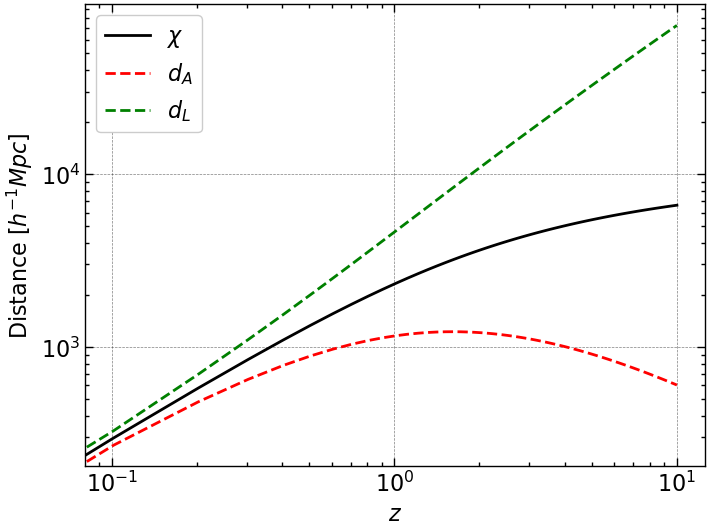

In [76]:
plt.plot(zs,chi,'k-',label = r'$\chi$')
plt.plot(zs, da, 'r--', label = r'$d_A$')
plt.plot(zs, dl, 'g--', label = r'$d_L$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'Distance $[h^{-1}Mpc]$')
plt.legend()

### Evolution of Neutrinos' Energy Density

for one generation of neutrino, only consider time after anilination, we have
$\rho_\nu/\rho_\gamma = \frac{15}{\pi^4}(\frac{T_\nu}{T_\gamma})^4 \int_0^\infty{\frac{x^2\sqrt{x^2+(m_\nu/T_\nu)^2}}{e^{x}+1}}dx$

here $T_\nu$ is just a scaling variable especially when neutrinos are no longer relativisitic

by entropy conservation argument we have $(\frac{T_\nu}{T_\gamma})^4 = (\frac{4}{11})^\frac{4}{3}$

suppose $m_\nu = 0.1eV$

start from $0.1MeV$ right after the anihilation and stop nowadays that $T_\gamma = 2.73K = 2.34\times 10^{-4} eV$ thus $T_\nu = 1.68\times 10^{-4} eV$

Further we can rearrange:$\Omega_\nu h^2 = \frac{\rho_\nu}{\rho_\gamma}\Omega_\gamma h^2$, where $\Omega_\gamma h^2 = 2.56\times 10^{-5}$

/tmp/ipykernel_2524/3231175280.py:5: RuntimeWarning: overflow encountered in exp
  ff = lambda x: x**2*np.sqrt(x**2+c**2)/(np.exp(x)+1)


<IPython.core.display.Math object>

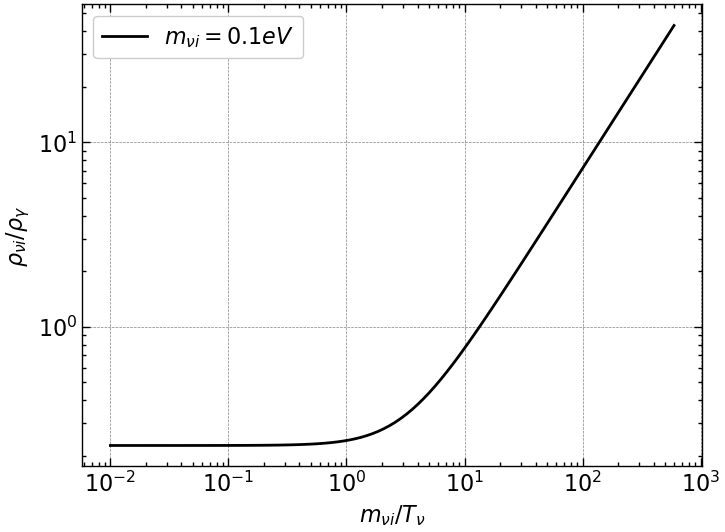

In [55]:
m_nu = 0.1 #eV
T_nu = 10**np.linspace(np.log10(0.1e2), np.log10(1.68e-4),100) #eV
xs = m_nu/T_nu
def f(c):
    ff = lambda x: x**2*np.sqrt(x**2+c**2)/(np.exp(x)+1)
    result = sp.integrate.quad(ff,0,np.inf)[0]
    return 15*(4/11)**(4/3)/np.pi**4*result
ys =  np.array([f(x) for x in xs])
plt.plot(xs,ys,'k-')
plt.xlabel(r'$m_{\nu i}/T_\nu$')
plt.ylabel(r'$\rho_{\nu i}/\rho_\gamma$')
plt.xscale('log')
plt.yscale('log')
plt.legend([r'$ m_{{\nu}i} = 0.1 eV $'])

dominator = (2.56e-5*f(m_nu/1.68e-4)/m_nu)**-1
from IPython.display import display, Math
display(Math(rf'\Omega_\nu h^2 = \frac{{\sum_i m_{{\nu_i}}}}{{{dominator:.4g} eV}}'))
